<a href="https://colab.research.google.com/github/rajaramkuberan/ANN_Coursework_Coventry_Univ/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANN Coursework**

## Project Contributors

####Rajaram Kuberan, Ashish Solanki 

Here, we will train the transferlearning NN to perform image classification on Ketogenic and Non-Ketogenic Food items, using transfer learning. Transfer learning means we will use. We will be using TensorFlow/Keras to build our neural network and training/test dataset. First, let's download the training and test data:
we have provided dada in github for public use. 

In [1]:
!git clone https://github.com/rajaramkuberan/ANN_Coursework_Coventry_Univ.git

Cloning into 'ANN_Coursework_Coventry_Univ'...
remote: Enumerating objects: 4703, done.
remote: Counting objects: 100% (4703/4703), done.
remote: Compressing objects: 100% (4695/4695), done.
remote: Total 30307 (delta 11), reused 4696 (delta 8), pack-reused 25604
Receiving objects: 100% (30307/30307), 6.11 GiB | 39.71 MiB/s, done.
Resolving deltas: 100% (308/308), done.
Checking out files: 100% (31402/31402), done.


#### **Data Preprocessing**

Now ,let's use ImageDataGenerator class to create our train and test dataset and normalize our data. 

It's important to normalize our data because data going into our CNN to improve its overall performance. We will use the rescale parameter to scale our image pixel values from [0, 255] to [0,1].

In each generator, we specify the source directory of our images, the classes, the input image size, the batch size (how many images to process at once), and class mode.

In [2]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV3Large, VGG19, VGG16, MobileNetV2,InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [3]:
# initialising the image size as 224x224
IMAGE_SIZE = [224,224]


# Setting the Path to test and train data 
test_path = '/content/ANN_Coursework_Coventry_Univ/test'
train_path = '/content/ANN_Coursework_Coventry_Univ/train'

In [4]:
# transforming train data images
train_datagen = ImageDataGenerator(rescale = 1/255)

# transforming train data images
test_datagen = ImageDataGenerator(rescale = 1/255)


In [5]:
#training data 
train_generator = train_datagen.flow_from_directory(
        '/content/ANN_Coursework_Coventry_Univ/train',  # This is the source directory for training images
        classes = ['Keto_train', 'Non_Keto_train'],
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=32,
        # Use binary labels
        class_mode='binary')

# testing data
test_generator = test_datagen.flow_from_directory(
        '/content/ANN_Coursework_Coventry_Univ/test',  # This is the source directory for training images
        classes = ['Keto_test', 'Non_Keto_Test'],
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=16,
        # Use binary labels
        class_mode='binary')

Found 24861 images belonging to 2 classes.
Found 6163 images belonging to 2 classes.


# **Building the Model**

Transfer Learning using Mobilenet Architectures. Using imagenet weights for training


In [6]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(224, 224, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [7]:
from tensorflow.keras.optimizers import RMSprop, Adam

from tensorflow.keras import optimizers

#model.compile(optimizer=Adam, loss = 'binary_crossentropy', metrics = 'accuracy')
model.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

### **Training**
Let's train for 300 epochs -- this may take a few hours to run.

Note that steps_per_epoch was set along with batch_size in ImageDataGenerator.

Notice that as we train, our test accuracy never exceeds training accuracy, which is a good thing. Our model won't work better on unseen images than seen images.

In [8]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = test_generator,
      validation_steps=5)

Epoch 1/15
5/5 [==============================] - 39s 1s/step - loss: 1.6801 - accuracy: 0.5891 - val_loss: 1.7263 - val_accuracy: 0.4750
Epoch 2/15
5/5 [==============================] - 3s 735ms/step - loss: 1.8833 - accuracy: 0.5339 - val_loss: 0.6763 - val_accuracy: 0.6625
Epoch 3/15
5/5 [==============================] - 3s 744ms/step - loss: 0.9271 - accuracy: 0.6918 - val_loss: 0.7014 - val_accuracy: 0.5875
Epoch 4/15
5/5 [==============================] - 3s 720ms/step - loss: 0.9045 - accuracy: 0.5286 - val_loss: 1.8538 - val_accuracy: 0.6250
Epoch 5/15
5/5 [==============================] - 3s 729ms/step - loss: 1.1765 - accuracy: 0.6324 - val_loss: 1.2003 - val_accuracy: 0.4000
Epoch 6/15
5/5 [==============================] - 3s 701ms/step - loss: 1.2249 - accuracy: 0.5468 - val_loss: 1.5001 - val_accuracy: 0.6500
Epoch 7/15
5/5 [==============================] - 3s 708ms/step - loss: 1.1124 - accuracy: 0.6650 - val_loss: 0.7725 - val_accuracy: 0.5125
Epoch 8/15
5/5 [======

# Accuracy, ROC Curve, and AUC

In [41]:
model.evaluate(test_generator)

386/386 [==============================] - 87s 224ms/step - loss: 1.8036 - accuracy: 0.6414


[1.8036162853240967, 0.641408383846283]

In [42]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
preds = model.predict(test_generator,
                      verbose=1)

386/386 [==============================] - 86s 220ms/step


In [49]:
fpr, tpr, _ = roc_curve(test_generator.classes, preds)

In [50]:
roc_auc = auc(fpr, tpr)

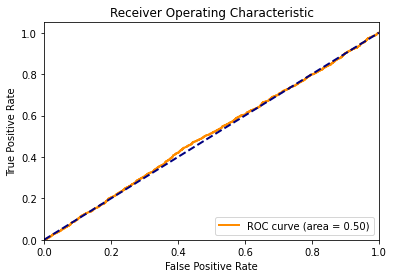

In [51]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()